### ### Case Study: How Does a Bike-Share Navigate Speedy Success?
 

The data set is for the year 2021 we will use this to answer the following questions:
1. How the Services are used by customer ?
2. How the customer use ther service monthly ?
3. How the customer use the service weekly ?
4. What is the average duration of services used by the customers ?
5. Which type of bike is most prefered by the customers on weekly basis ?
6. What are the most visited station by members and casual riders ?
7. how the usage of the bike service differ from casual riders and members ?

In [1]:
#Importing Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
 cd C:/Users/SRIMON/Documents/Python Directory/Bike Trip Data

C:\Users\SRIMON\Documents\Python Directory\Bike Trip Data


In [3]:
df_1 = pd.read_csv("202101-divvy-tripdata.csv")

In [4]:
df_2 = pd.read_csv("202102-divvy-tripdata.csv")

In [5]:
df_3 = pd.read_csv("202103-divvy-tripdata.csv")

In [6]:
df_4 = pd.read_csv("202104-divvy-tripdata.csv")

In [7]:
df_5 = pd.read_csv("202105-divvy-tripdata.csv")

In [8]:
df_6 = pd.read_csv("202106-divvy-tripdata.csv")

In [9]:
df_7 = pd.read_csv("202107-divvy-tripdata.csv")

In [10]:
df_8 = pd.read_csv("202108-divvy-tripdata.csv")

In [11]:
df_9 = pd.read_csv("202109-divvy-tripdata.csv")

In [12]:
df_10 = pd.read_csv("202110-divvy-tripdata.csv")

In [13]:
df_11 = pd.read_csv("202111-divvy-tripdata.csv")

In [14]:
df_12 = pd.read_csv("202112-divvy-tripdata.csv")

In [15]:
#concatinating the data frames into a single one for analysis
Trip_data_2021 = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12], ignore_index=True)

In [16]:
Trip_data_2021.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


### Data wrangling process 

In [ ]:
# find the missing values in percentage
for col in Trip_data_2021.columns:
    pct_missing = np.mean(Trip_data_2021[col].isnull())*100
    print('{} - {}%'.format(col, pct_missing))

In [18]:
#changing columns names to readable format
Trip_data_2021 = Trip_data_2021.rename(columns={'rideable_type':'ride_type','started_at':'start_time','ended_at':'end_time','member_casual':'customer_type' })

In [19]:
Trip_data_2021.columns

Index(['ride_id', 'ride_type', 'start_time', 'end_time', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'customer_type'],
      dtype='object')

In [20]:
#converting Start _time & end_time to datetime 64 type from object type 
Trip_data_2021['start_time'] = pd.to_datetime(Trip_data_2021.start_time)
Trip_data_2021['end_time'] = pd.to_datetime(Trip_data_2021.end_time)

In [21]:
#finding trip_duration_mins to find the trip duration
Trip_data_2021['trip_duration'] = Trip_data_2021['end_time'] - Trip_data_2021['start_time']

In [22]:
Trip_data_2021.head()

,ride_id,ride_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,customer_type,trip_duration
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,0 days 00:10:25
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,0 days 00:04:04
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,0 days 00:01:20
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,0 days 00:11:42
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,0 days 00:00:43


In [23]:
#extracting minutes from trip duration
Trip_data_2021['trip_duration'] = Trip_data_2021['trip_duration'].dt.components['minutes']

In [24]:
#Extracting the dates from col: start_time
Trip_data_2021['date'] = Trip_data_2021['start_time'].dt.date

In [25]:
# converting date to weekdays in days_of_week for analysis on weekdays and weekends
Trip_data_2021['date'] = pd.to_datetime(Trip_data_2021['date'])
Trip_data_2021['day_of_week'] = Trip_data_2021['date'].dt.day_name()

In [26]:
Trip_data_2021.head()

,ride_id,ride_type,start_time,end_time,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,customer_type,trip_duration,date,day_of_week
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member,10,2021-01-23,Saturday
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member,4,2021-01-27,Wednesday
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member,1,2021-01-21,Thursday
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member,11,2021-01-07,Thursday
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual,0,2021-01-23,Saturday


In [27]:
#Extracting month year from col: dates in a month-year format
Trip_data_2021['MonthYear'] = Trip_data_2021['date'].apply(lambda x: x.strftime('%B-%Y'))

In [28]:
#Droppin the rows where trip duration is 0
Trip_data_2021.drop(Trip_data_2021.index[Trip_data_2021['trip_duration']==0], inplace=True )

This is to be done because if the trip duration is 0 then we could assume that the bike has been used for maintainence.

In [124]:
#Filling the null values with 0 
Trip_data_2021['end_lat'] = Trip_data_2021['end_lat'].fillna(0)
Trip_data_2021['end_lng'] = Trip_data_2021['end_lng'].fillna(0)

In [30]:
##Droppin the rows where end_latitude & end longitude is 0
Trip_data_2021.drop(Trip_data_2021.index[Trip_data_2021['end_lat']==0], inplace=True )
Trip_data_2021.drop(Trip_data_2021.index[Trip_data_2021['end_lng']==0], inplace=True )

In [31]:
#dropping unnecessary columns
Trip_data_2021 = Trip_data_2021.drop(columns=['ride_id','start_station_id','end_station_id'])

In [32]:
df_trip_duration_weekly = Trip_data_2021.groupby(["customer_type","day_of_week"])["trip_duration"].sum()
df_trip_duration_weekly = df_trip_duration_weekly.reset_index()
df_trip_duration_weekly 

,customer_type,day_of_week,trip_duration
0,casual,Friday,6264509
1,casual,Monday,5151539
2,casual,Saturday,10690767
3,casual,Sunday,9447964
4,casual,Thursday,4647730
5,casual,Tuesday,4588524
6,casual,Wednesday,4579447
7,member,Friday,5232557
8,member,Monday,4836218
9,member,Saturday,5733907


In [33]:
df_trip_duration_monthly = Trip_data_2021.groupby(["customer_type","MonthYear"])["trip_duration"].sum()
df_trip_duration_monthly

customer_type  MonthYear     
casual         April-2021        2633550
               August-2021       7428655
               December-2021      961243
               February-2021      181753
               January-2021       274567
               July-2021         8148115
               June-2021         6995942
               March-2021        1649715
               May-2021          5049373
               November-2021     1505266
               October-2021      4174468
               September-2021    6367833
member         April-2021        2577078
               August-2021       4900656
               December-2021     1736335
               February-2021      497289
               January-2021       872813
               July-2021         4821547
               June-2021         4637289
               March-2021        1803483
               May-2021          3546625
               November-2021     2502643
               October-2021      4105536
               September-20

In [34]:
df_trip_duration_monthly = df_trip_duration_monthly.reset_index()
df_trip_duration_monthly

,customer_type,MonthYear,trip_duration
0,casual,April-2021,2633550
1,casual,August-2021,7428655
2,casual,December-2021,961243
3,casual,February-2021,181753
4,casual,January-2021,274567
5,casual,July-2021,8148115
6,casual,June-2021,6995942
7,casual,March-2021,1649715
8,casual,May-2021,5049373
9,casual,November-2021,1505266


In [35]:
df_bike_usage = Trip_data_2021.groupby(["customer_type","ride_type","day_of_week"])["trip_duration"].sum()
df_bike_usage = df_bike_usage.reset_index()
df_bike_usage 

,customer_type,ride_type,day_of_week,trip_duration
0,casual,classic_bike,Friday,3052176
1,casual,classic_bike,Monday,2465949
2,casual,classic_bike,Saturday,5772147
3,casual,classic_bike,Sunday,5036041
4,casual,classic_bike,Thursday,2233385
5,casual,classic_bike,Tuesday,2117549
6,casual,classic_bike,Wednesday,2173224
7,casual,docked_bike,Friday,1001053
8,casual,docked_bike,Monday,900525
9,casual,docked_bike,Saturday,1924973


In [36]:
df_service_usage = Trip_data_2021.groupby(["customer_type"])["trip_duration"].sum()
df_service_usage = df_service_usage.reset_index()
df_service_usage

,customer_type,trip_duration
0,casual,45370480
1,member,36768683


### Explotary Data Analysis and Data Visualization

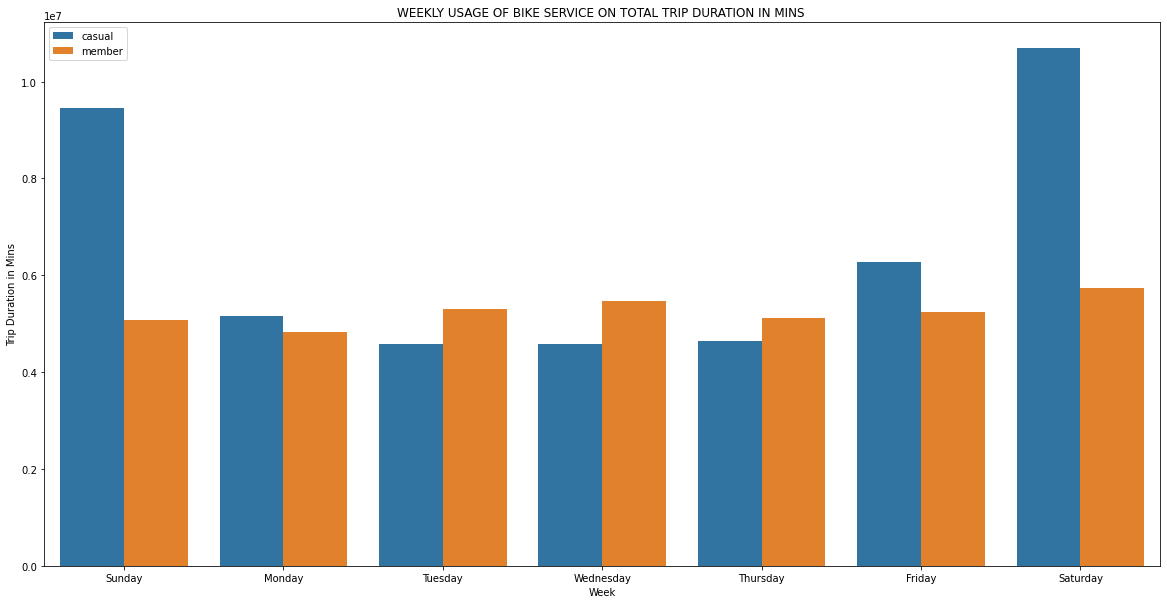

In [37]:
plt.figure(figsize = (20,10))
sns.barplot(data = df_trip_duration_weekly, x = "day_of_week", y = "trip_duration", hue = 'customer_type', order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]  )
plt.xlabel("Week")
plt.ylabel("Trip Duration in Mins")
plt.title('WEEKLY USAGE OF BIKE SERVICE ON TOTAL TRIP DURATION IN MINS ')
plt.legend()
plt.show()

From the above plot we can see that the total duration of service usage of casual riders is high than the member

the usage of the service exponentially grow on saturday and sunday this could be due to holidays.

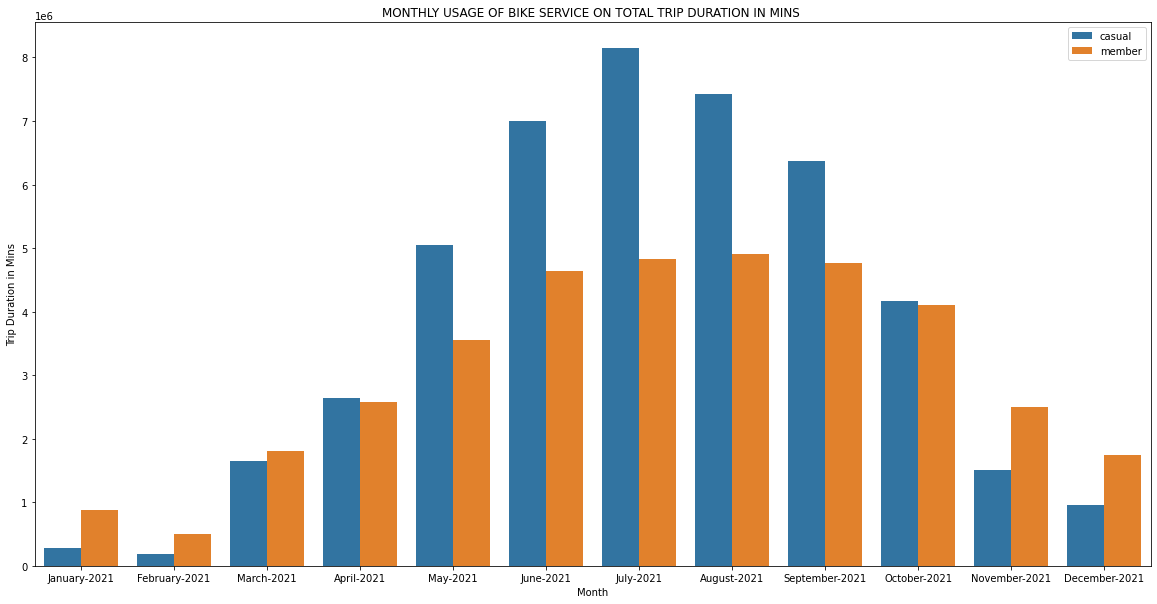

In [38]:
plt.figure(figsize = (20,10))
sns.barplot(data = df_trip_duration_monthly, x = "MonthYear", y = "trip_duration", hue = 'customer_type', order = ["January-2021", "February-2021", "March-2021", "April-2021", "May-2021", "June-2021", "July-2021","August-2021", "September-2021", "October-2021", "November-2021", "December-2021"]  )
plt.xlabel("Month")
plt.ylabel("Trip Duration in Mins")
plt.title('MONTHLY USAGE OF BIKE SERVICE ON TOTAL TRIP DURATION IN MINS ')
plt.legend()
plt.show()

The above plot shows that the total trip duatration of casual riders and member riders on month basis.
this show the usage of the services by the casual riders is high than members no matter what the month is, but the graph shows that there is significant decrease during from the month october to february this could be due to rainy and winter season when people prefer public transport rather than bike services due to the weather

[Text(0.5, 1.0, 'AVERAGE DURATION IN MINS OF BIKE SERVICE USED BETWEEN CUSTOMERS')]

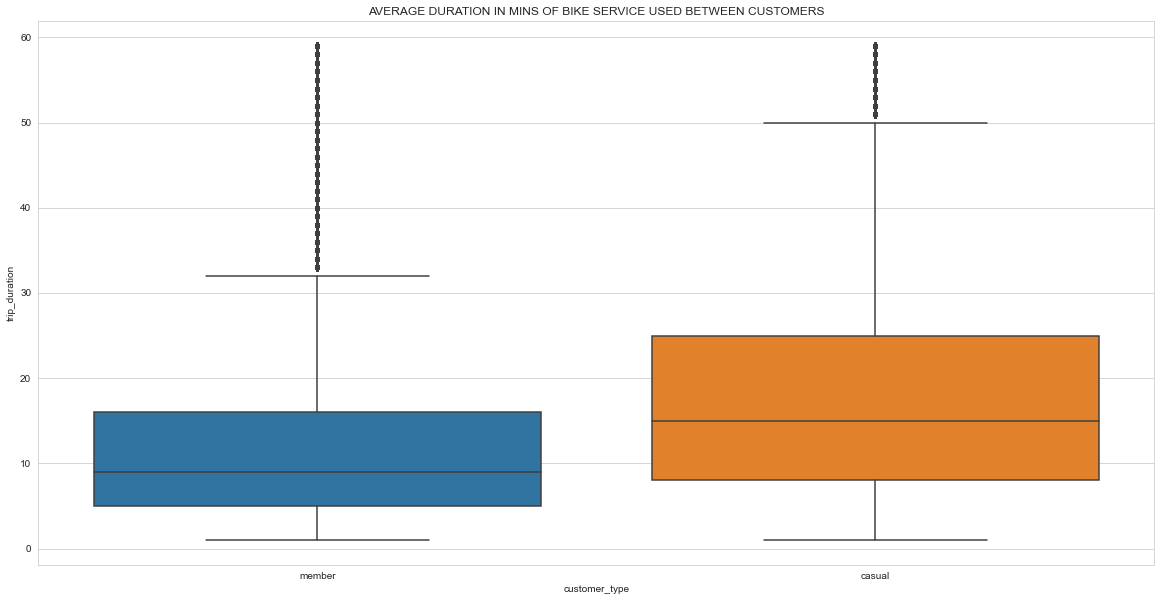

In [39]:
plt.figure(figsize = (20,10))
sns.set_style('whitegrid')
sns.boxplot(x='customer_type', y='trip_duration', data = Trip_data_2021).set(title = 'AVERAGE DURATION IN MINS OF BIKE SERVICE USED BETWEEN CUSTOMERS')

From the above plot we can see that the average trip duration taken by a menber is of 8-18 mins where as the avg. trip duration taken by a casual rider is about 25-26 mins but there are few riders who have taken the duaration from 8-26 mins 

In [40]:
# filtering the data frame to find the uasge of bikes as per customer type
df_member_Trip_data = Trip_data_2021[(Trip_data_2021['customer_type']=='member')]

In [41]:
# filtering the data frame to find the uasge of bikes as per customer type
df_casual_Trip_data = Trip_data_2021[(Trip_data_2021['customer_type']=='casual')]

In [46]:
#extracting time from start time to determine for day and time analysis in trip duration
Trip_data_2021['time'] = Trip_data_2021['start_time'].dt.time

In [48]:
Trip_data_2021.head()

,ride_type,start_time,end_time,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,customer_type,trip_duration,date,day_of_week,MonthYear,time
0,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,NaN,41.900341,-87.696743,41.89,-87.72,member,10,2021-01-23,Saturday,January-2021,16:14:19
1,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,NaN,41.900333,-87.696707,41.90,-87.69,member,4,2021-01-27,Wednesday,January-2021,18:43:08
2,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,NaN,41.900313,-87.696643,41.90,-87.70,member,1,2021-01-21,Thursday,January-2021,22:35:54
3,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,NaN,41.900399,-87.696662,41.92,-87.69,member,11,2021-01-07,Thursday,January-2021,13:31:13
5,electric_bike,2021-01-09 14:24:07,2021-01-09 15:17:54,California Ave & Cortez St,NaN,41.900409,-87.696763,41.94,-87.71,casual,53,2021-01-09,Saturday,January-2021,14:24:07


In [103]:
df_station_names_members = df_member_Trip_data.groupby(["start_station_name", "end_station_name", "start_lat", "start_lng", "end_lat", "end_lng"  ])["trip_duration"].sum()
df_station_names_members = df_station_names_members.reset_index()
df_station_names_members = df_station_names_members.sort_values(by='trip_duration', ascending=False)

In [106]:
df_top_station_names_members=df_station_names_members.head(10)

In [107]:
df_top_station_names_members

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,trip_duration
572708,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,41.892278,-87.612043,41.892278,-87.612043,18697
231099,Ellis Ave & 60th St,Ellis Ave & 55th St,41.785097,-87.601073,41.794301,-87.601450,18367
343239,Lakefront Trail & Bryn Mawr Ave,Theater on the Lake,41.984037,-87.652310,41.926277,-87.630834,18258
230070,Ellis Ave & 55th St,Ellis Ave & 60th St,41.794301,-87.601450,41.785097,-87.601073,17578
342638,Lakefront Trail & Bryn Mawr Ave,Lakefront Trail & Bryn Mawr Ave,41.984037,-87.652310,41.984037,-87.652310,17049
574684,Theater on the Lake,Lakefront Trail & Bryn Mawr Ave,41.926277,-87.630834,41.984037,-87.652310,16758
247624,Fort Dearborn Dr & 31st St,Fort Dearborn Dr & 31st St,41.838556,-87.608218,41.838556,-87.608218,14486
55315,Burnham Harbor,Shore Dr & 55th St,41.856268,-87.613348,41.795212,-87.580715,13994
54606,Burnham Harbor,Burnham Harbor,41.856268,-87.613348,41.856268,-87.613348,13672
575427,Theater on the Lake,Theater on the Lake,41.926277,-87.630834,41.926277,-87.630834,12945


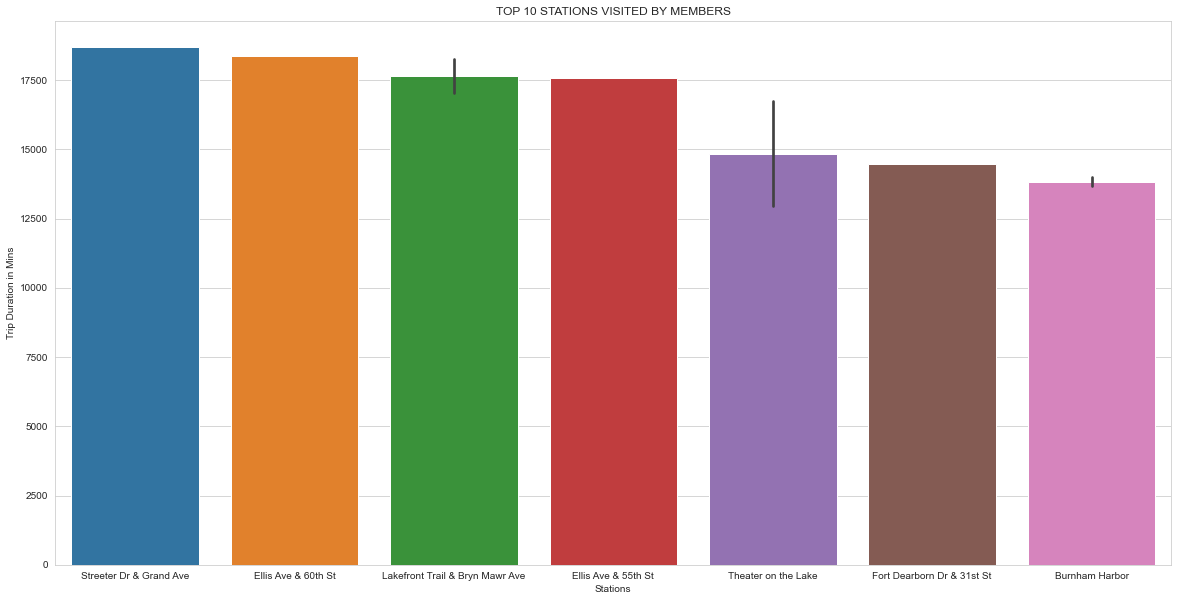

In [122]:
plt.figure(figsize = (20,10))
sns.barplot(data = df_top_station_names_members, x = "start_station_name", y = "trip_duration")
plt.xlabel("Stations")
plt.ylabel("Trip Duration in Mins")
plt.title('TOP 10 STATIONS VISITED BY MEMBERS')
plt.show()

From the above plot we can see the most satation visited by members the station has a common thing that it has at least 2-3 railway station present in nearby radius of Avg. 3 km this could be showing that most working professional, college students could be using the bike service to travel to station on a daily basis.

For burnham harbor at 2.5 km distance bridge point china town is present which could possible that the various people visting the china town could be using the bike service others could working professional as 3 nos. of railway station are present


In [108]:
df_station_names_casual = df_casual_Trip_data.groupby(["start_station_name", "end_station_name", "start_lat", "start_lng", "end_lat", "end_lng"  ])["trip_duration"].sum()
df_station_names_casual = df_station_names_casual.reset_index()
df_station_names_casual = df_station_names_casual.sort_values(by='trip_duration', ascending=False)

In [109]:
df_top_station_names_casual=df_station_names_casual.head(10)

In [110]:
df_top_station_names_casual

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,trip_duration
524572,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,41.892278,-87.612043,41.892278,-87.612043,249015
297266,Lake Shore Dr & Monroe St,Lake Shore Dr & Monroe St,41.880958,-87.616743,41.880958,-87.616743,105764
365409,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,75542
529573,Theater on the Lake,Theater on the Lake,41.926277,-87.630834,41.926277,-87.630834,74563
389033,Montrose Harbor,Montrose Harbor,41.963982,-87.638181,41.963982,-87.638181,70097
222026,Fort Dearborn Dr & 31st St,Fort Dearborn Dr & 31st St,41.838556,-87.608218,41.838556,-87.608218,67605
379667,Millennium Park,Millennium Park,41.881032,-87.624084,41.881032,-87.624084,65536
379666,Millennium Park,Millennium Park,41.881032,-87.624084,41.881032,-87.624084,65214
191602,DuSable Lake Shore Dr & Monroe St,DuSable Lake Shore Dr & Monroe St,41.880958,-87.616743,41.880958,-87.616743,65030
353893,Michigan Ave & 8th St,Michigan Ave & 8th St,41.872773,-87.623981,41.872773,-87.623981,63468


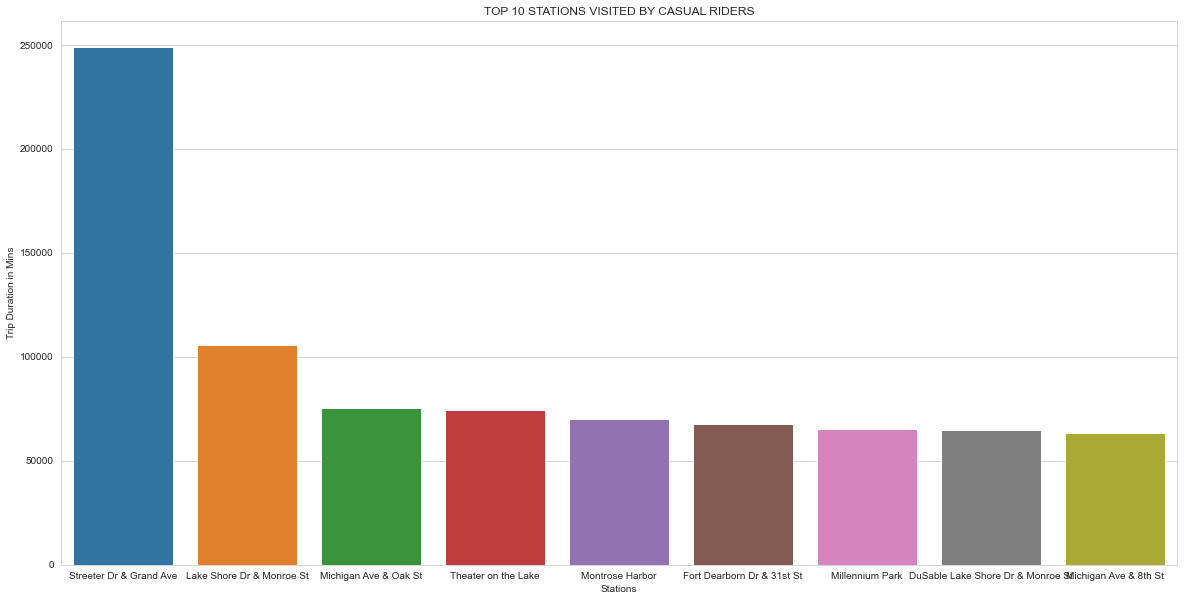

In [123]:
plt.figure(figsize = (20,10))
sns.barplot(data = df_top_station_names_casual, x = "start_station_name", y = "trip_duration")
plt.xlabel("Stations")
plt.ylabel("Trip Duration in Mins")
plt.title('TOP 10 STATIONS VISITED BY CASUAL RIDERS')
plt.show()

From The above plot we can see that the most visited station is Streeter Dr & Grand Ave which is exponentially high this could be due to various popular places to visit such as Chicago Children's Museum, Lake Point Tower, Navy Pier & Museum of Contemporary Art Chicago 

these places could be popular between the tourists and the localites 

thus, using bike services is comparatively cheaper than any other services to visit these places.

In [114]:
weekly_bike_usage_members = df_member_Trip_data.groupby(["day_of_week","ride_type"])["trip_duration"].sum()
weekly_bike_usage_members = weekly_bike_usage_members.reset_index()
weekly_bike_usage_members

,day_of_week,ride_type,trip_duration
0,Friday,classic_bike,3385218
1,Friday,electric_bike,1847339
2,Monday,classic_bike,3250061
3,Monday,electric_bike,1586157
4,Saturday,classic_bike,3895114
5,Saturday,electric_bike,1838793
6,Sunday,classic_bike,3510841
7,Sunday,electric_bike,1554893
8,Thursday,classic_bike,3358862
9,Thursday,electric_bike,1765304


[Text(0.5, 1.0, 'WEEKLY USAGE OF BIKE TYPE BY MEMBERS ON TOTAL TRIP DURATION IN MINS ')]

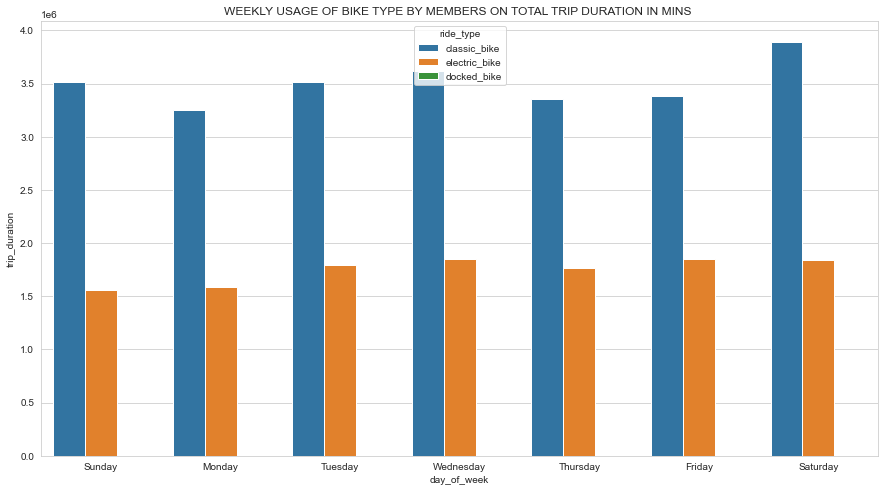

In [118]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set_style('whitegrid')
sns.barplot(x='day_of_week', y='trip_duration', hue = 'ride_type', order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"] , data = weekly_bike_usage_members).set(title = 'WEEKLY USAGE OF BIKE TYPE BY MEMBERS ON TOTAL TRIP DURATION IN MINS ')

From the above plot we can see that the type of bike preference by the members, the most prefered bike by the members is classic bike and electric bike, the usage of both bikes is nearly same, where as the docked bike is not preferred by the members.

There could be two major reasons for that:
1. The subscription prices for docked bike could be high as they require more maintainence for the bike and the docking station.

2. Apart from dockless bike docked bikes are picked up from and returned to docking stations, the availbility of a docking station could be a issue here as the member riders who use the service on a daily routine should have a specific rout of travel, if the docking station is not available there there will be no meaning of using a docked bike in that case he will prefer electric bike or classic bike which could be parked anywhere.

from the previous plot on most station used by the members we concluded that most of the bike station are located near railway sation

in this plot the trip duration has remain nearly in the same range no major differences is to be seen throughout the week except for saturday.

this proves that the majority of the members are working professional who use the bike services on daily basis.



In [115]:
weekly_bike_usage_casual = df_casual_Trip_data.groupby(["day_of_week","ride_type"])["trip_duration"].sum()
weekly_bike_usage_casual = weekly_bike_usage_casual.reset_index()
weekly_bike_usage_casual

,day_of_week,ride_type,trip_duration
0,Friday,classic_bike,3052176
1,Friday,docked_bike,1001053
2,Friday,electric_bike,2211280
3,Monday,classic_bike,2465949
4,Monday,docked_bike,900525
5,Monday,electric_bike,1785065
6,Saturday,classic_bike,5772147
7,Saturday,docked_bike,1924973
8,Saturday,electric_bike,2993647
9,Sunday,classic_bike,5036041


[Text(0.5, 1.0, 'WEEKLY USAGE OF BIKE TYPE BY CASUAL RIDERS ON TOTAL TRIP DURATION IN MINS ')]

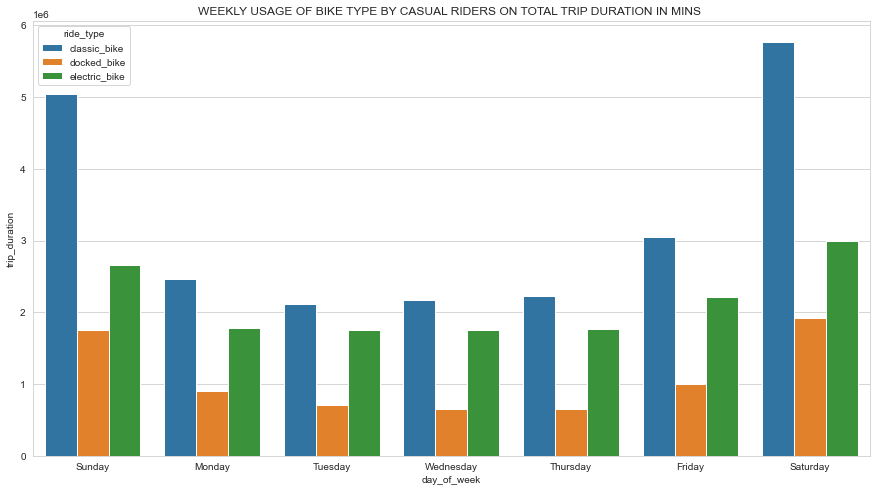

In [117]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set_style('whitegrid')
sns.barplot(x='day_of_week', y='trip_duration', hue = 'ride_type', order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"] , data = weekly_bike_usage_casual ).set(title = 'WEEKLY USAGE OF BIKE TYPE BY CASUAL RIDERS ON TOTAL TRIP DURATION IN MINS ')

From the above plot we can see that the type of bike preference by tye casual riders, the most prefered bike by casual riders is the classic bike folllowed by electric bike and docked bike.

The usage of the services is nearly same throughout the week except for weekends 

As from the pervious plot and the above plot we can conclude that the usage of docked bikes is relatively low this supports the theory about the avaibility of docking stations could be less and the cost of the services of using docked bikes could be high due the cost of providing docking station and the product itself.

for both members an casual riders cost could be a effective point as the bike services is an cheaper alternative for other veichle services.

The reason behind the highly usage of classic bike could be the cost of service as they require the lowest maintenance considering the other types and this could directly affect the cost.